# Multiple pendulum plots. Section 12.4: Approach to Chaos

Use Pendulum class to generate basic pendulum plots.  Applied here to figures from Taylor Section 12.4.

* Last revised 23-Jan-2019 by Dick Furnstahl (furnstahl.1@osu.edu).

In [25]:
%matplotlib inline

In [26]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt

## Pendulum class and utility functions

In [27]:
class Pendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    beta : float
        coefficient of friction 
    gamma_ext : float
        amplitude of external force is gamma * omega_0**2 
    omega_ext : float
        frequency of external force 
    phi_ext : float
        phase angle for external force 

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    driving_force(t) 
        Returns the value of the external driving force at time t.
    """
    def __init__(self, omega_0=1., beta=0.2,
                 gamma_ext=0.2, omega_ext=0.689, phi_ext=0.
                ):
        self.omega_0 = omega_0
        self.beta = beta
        self.gamma_ext = gamma_ext
        self.omega_ext = omega_ext
        self.phi_ext = phi_ext
    
    def dy_dt(self, y, t):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        F_ext = self.driving_force(t)
        return [y[1], -self.omega_0**2 * np.sin(y[0]) - 2.*self.beta * y[1] \
                       + F_ext]
    
    def driving_force(self, t):
        """
        This function returns the value of the driving force at time t.
        """
        return self.gamma_ext * self.omega_0**2 \
                              * np.cos(self.omega_ext*t + self.phi_ext)  
    
    def solve_ode(self, phi_0, phi_dot_0, abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0, phi_dot_0]  
        phi, phi_dot = odeint(self.dy_dt, y, t_pts, 
                              atol=abserr, rtol=relerr).T
        return phi, phi_dot

In [28]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [29]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    """Given an array (e.g., of times) and desired starting and stop values,
        return the array indices that are closest to those values.
    """
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make plots for Taylor Figure 12.4

We'll set it up with the specified parameters.

In [30]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.06
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


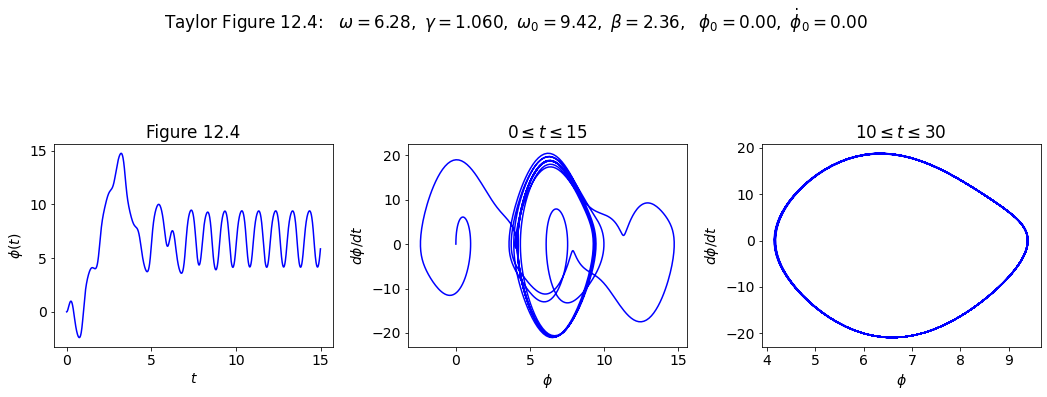

In [31]:
# initial conditions specified
phi_0 = 0.
phi_dot_0 = 0.0
phi, phi_dot = p1.solve_ode(phi_0, phi_dot_0)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Taylor Figure 12.4:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=15   
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 0., 15.)    
plot_y_vs_x(t_pts[start : stop], phi[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='Figure 12.4', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=15   
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 0., 15.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 15$', 
            ax=ax_b)    

# third plot: state space plot from t= to t=12   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 10., 30.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$10 \leq t \leq 30$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('Figure_12.4.png', bbox_inches='tight')  # always bbox_inches='tight'

Let's check for periodicity after the transients die out.  Print out phi(t) once every period of the external driving force.

In [34]:
delta_index

100

In [36]:
tau_ext

1.0

In [35]:
delta_t

0.01

In [33]:
t_pts

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 9.998e+01, 9.999e+01,
       1.000e+02])

In [39]:
# First pass at periodicity check
start, stop = start_stop_indices(t_pts, 50., 70.)    
tau_ext = 2.*np.pi / omega_ext
delta_index = int(tau_ext / delta_t)

print('   t     phi(t)')
for index in range(start, stop, delta_index):
    print(f'  {t_pts[index]:.1f}   {phi[index]:.4f}')

   t     phi(t)
  50.0   6.0366
  51.0   6.0367
  52.0   6.0366
  53.0   6.0366
  54.0   6.0366
  55.0   6.0366
  56.0   6.0366
  57.0   6.0367
  58.0   6.0366
  59.0   6.0366
  60.0   6.0366
  61.0   6.0366
  62.0   6.0366
  63.0   6.0366
  64.0   6.0366
  65.0   6.0366
  66.0   6.0366
  67.0   6.0366
  68.0   6.0366
  69.0   6.0366


Now trying the power spectrum in steady state, plotting only positive frequencies and cutting off any lower peaks from noise.  We multiply the frequencies by $2\pi$ to get the angular frequency.  **What do you observe?**

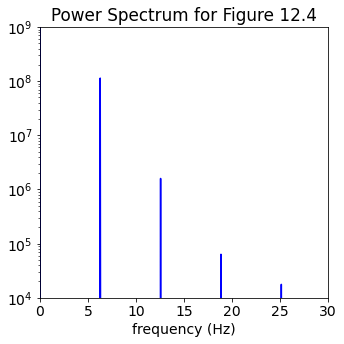

In [40]:
start, stop = start_stop_indices(t_pts, 20., t_end)    
signal = phi[start:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = 2.*np.pi * np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='blue')
ax_ps.set_xlim(0, 30.)
ax_ps.set_ylim(1.e4, 1.e9)
ax_ps.set_xlabel('frequency (Hz)')
ax_ps.set_title('Power Spectrum for Figure 12.4')

fig_ps.tight_layout()


## Figure 12.5: Pick conditions and then analyze

In [41]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.073   
omega_ext = 2.*np.pi
phi_ext = 0.  

omega_0 = 1.5*omega_ext
beta = omega_0/4.  

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


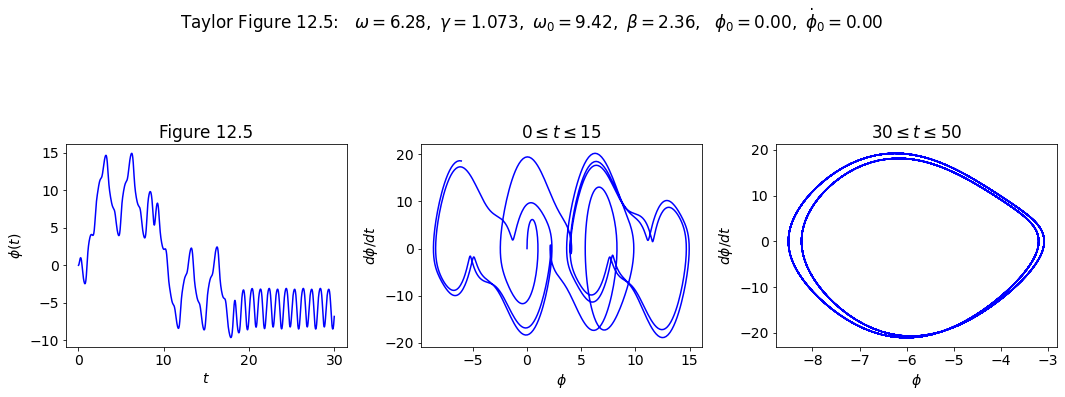

In [45]:
# initial conditions specified
phi_0 = 0.
phi_dot_0 = 0.0
phi, phi_dot = p1.solve_ode(phi_0, phi_dot_0)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Taylor Figure 12.5:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=15   
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 0., 30.)    
plot_y_vs_x(t_pts[start : stop], phi[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='Figure 12.5', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=15   
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 0., 15.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 15$', 
            ax=ax_b)    

# third plot: state space plot from t= to t=12   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 40., 60.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$30 \leq t \leq 50$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('Figure_12.5.png', bbox_inches='tight')  # always bbox_inches='tight'

In [43]:
# First pass at periodicity check
start, stop = start_stop_indices(t_pts, 50., 70.)    
tau_ext = 2.*np.pi / omega_ext
delta_index = int(tau_ext / delta_t)

print('   t     phi(t)')
for index in range(start, stop, delta_index):
    print(f'  {t_pts[index]:.1f}   {phi[index]:.4f}')

   t     phi(t)
  50.0   -6.6438
  51.0   -6.4090
  52.0   -6.6438
  53.0   -6.4090
  54.0   -6.6438
  55.0   -6.4090
  56.0   -6.6437
  57.0   -6.4090
  58.0   -6.6438
  59.0   -6.4090
  60.0   -6.6437
  61.0   -6.4090
  62.0   -6.6438
  63.0   -6.4090
  64.0   -6.6438
  65.0   -6.4090
  66.0   -6.6439
  67.0   -6.4090
  68.0   -6.6439
  69.0   -6.4090


Now trying the power spectrum in steady state, plotting only positive frequencies and cutting off any lower peaks from noise.  We multiply the frequencies by $2\pi$ to get the angular frequency.  **What do you observe?**

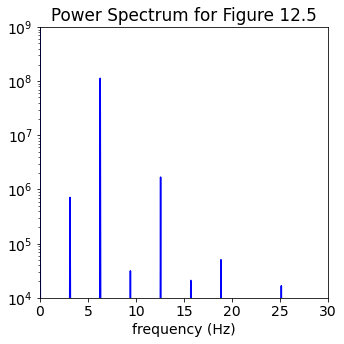

In [46]:
start, stop = start_stop_indices(t_pts, 20., t_end)    
signal = phi[start:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = 2.*np.pi * np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='blue')
ax_ps.set_xlim(0, 30.)
ax_ps.set_ylim(1.e4, 1.e9)
ax_ps.set_xlabel('frequency (Hz)')
ax_ps.set_title('Power Spectrum for Figure 12.5')

fig_ps.tight_layout()


## Make plots for Taylor Figure 12.6


In [47]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.077
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


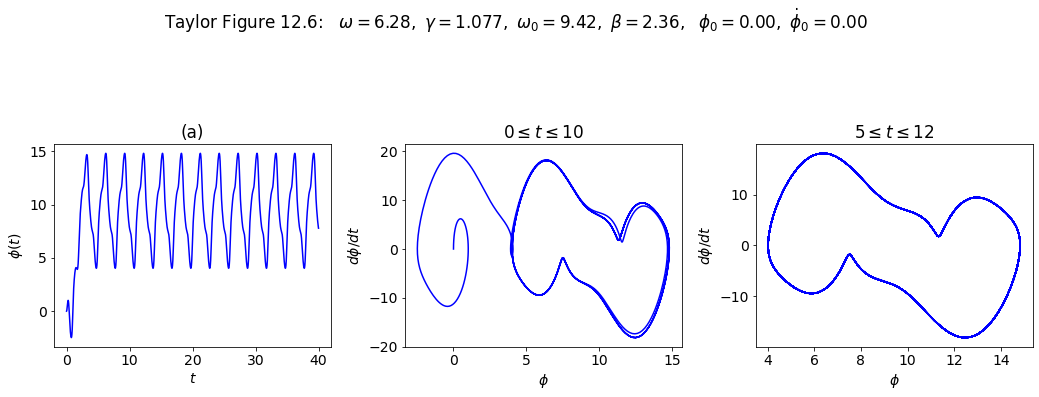

In [48]:
# initial conditions specified
phi_0 = 0.
phi_dot_0 = 0.0
phi, phi_dot = p1.solve_ode(phi_0, phi_dot_0)
phi_fig12_6 = phi

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Taylor Figure 12.6:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=10   
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 0., 40.)    
plot_y_vs_x(t_pts[start : stop], phi[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='(a)', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=10   
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 0., 15.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 10$', 
            ax=ax_b)    

# third plot: state space plot from t=5 to t=12   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 20, 100.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$5 \leq t \leq 12$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('Figure_12.6.png', bbox_inches='tight')  # always bbox_inches='tight'

In [49]:
# First pass at periodicity check
start, stop = start_stop_indices(t_pts, 50., 70.)    
tau_ext = 2.*np.pi / omega_ext
delta_index = int(tau_ext / delta_t)

print('   t     phi(t)')
for index in range(start, stop, delta_index):
    print(f'  {t_pts[index]:.1f}   {phi[index]:.4f}')

   t     phi(t)
  50.0   6.8727
  51.0   13.8123
  52.0   7.7586
  53.0   6.8726
  54.0   13.8123
  55.0   7.7586
  56.0   6.8726
  57.0   13.8123
  58.0   7.7586
  59.0   6.8726
  60.0   13.8123
  61.0   7.7586
  62.0   6.8725
  63.0   13.8123
  64.0   7.7586
  65.0   6.8726
  66.0   13.8123
  67.0   7.7586
  68.0   6.8726
  69.0   13.8123


Now trying the power spectrum in steady state, plotting only positive frequencies and cutting off any lower peaks from noise.  We multiply the frequencies by $2\pi$ to get the angular frequency.  **What do you observe?**

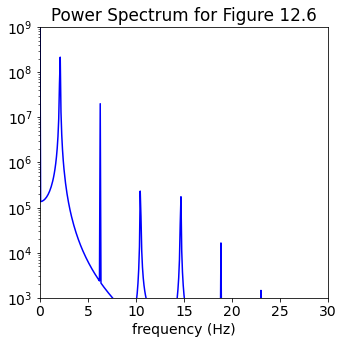

In [50]:
start, stop = start_stop_indices(t_pts, 20., t_end)    
signal = phi[start:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = 2.*np.pi * np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='blue')
ax_ps.set_xlim(0, 30.)
ax_ps.set_ylim(1.e3, 1.e9)
ax_ps.set_xlabel('frequency (Hz)')
ax_ps.set_title('Power Spectrum for Figure 12.6')

fig_ps.tight_layout()


## Make plots for Taylor Figure 12.7


In [51]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 500.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.077
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


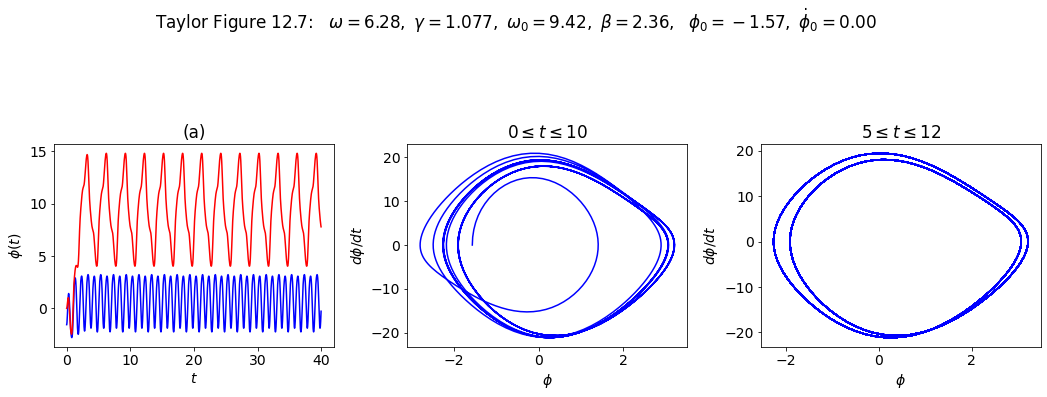

In [52]:
# initial conditions specified
phi_0 = -np.pi/2.
phi_dot_0 = 0.0
phi, phi_dot = p1.solve_ode(phi_0, phi_dot_0)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Taylor Figure 12.7:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=10   
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 0., 40.)    
plot_y_vs_x(t_pts[start : stop], phi[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='(a)', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], phi_fig12_6[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=None, 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=15   
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 0., 15.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 10$', 
            ax=ax_b)    

# third plot: state space plot from t=5 to t=12   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 20, 100.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$5 \leq t \leq 12$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('Figure_12.7.png', bbox_inches='tight')  # always bbox_inches='tight'

In [53]:
# First pass at periodicity check
start, stop = start_stop_indices(t_pts, 50., 70.)    
tau_ext = 2.*np.pi / omega_ext
delta_index = int(tau_ext / delta_t)

print('   t     phi(t)')
for index in range(start, stop, delta_index):
    print(f'  {t_pts[index]:.1f}   {phi[index]:.4f}')

   t     phi(t)
  50.0   -0.1071
  51.0   -0.4051
  52.0   -0.1071
  53.0   -0.4049
  54.0   -0.1071
  55.0   -0.4051
  56.0   -0.1071
  57.0   -0.4049
  58.0   -0.1071
  59.0   -0.4050
  60.0   -0.1071
  61.0   -0.4051
  62.0   -0.1071
  63.0   -0.4049
  64.0   -0.1071
  65.0   -0.4052
  66.0   -0.1071
  67.0   -0.4049
  68.0   -0.1071
  69.0   -0.4050


Now trying the power spectrum in steady state, plotting only positive frequencies and cutting off any lower peaks from noise.  We multiply the frequencies by $2\pi$ to get the angular frequency.  **What do you observe?**

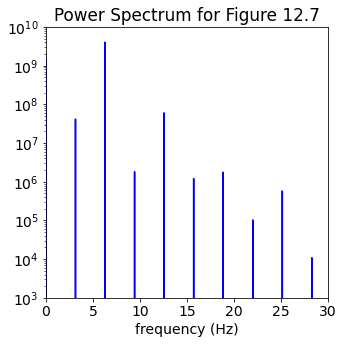

In [54]:
start, stop = start_stop_indices(t_pts, 20., t_end)    
signal = phi[start:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = 2.*np.pi * np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='blue')
ax_ps.set_xlim(0, 30.)
ax_ps.set_ylim(1.e3, 1.e10)
ax_ps.set_xlabel('frequency (Hz)')
ax_ps.set_title('Power Spectrum for Figure 12.7')

fig_ps.tight_layout()


## Make plots for Taylor Figure 12.8

Now we try to plot a period doubling cascade as in Figure 12.8.  This will mean plots of four different conditions, each with two plots.

In [55]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common parameters
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate the pendulu s
gamma_ext = 1.060
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

gamma_ext = 1.078
p2 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

gamma_ext = 1.081
p3 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

gamma_ext = 1.0826
p4 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts (all the same)
driving = p1.driving_force(t_pts)


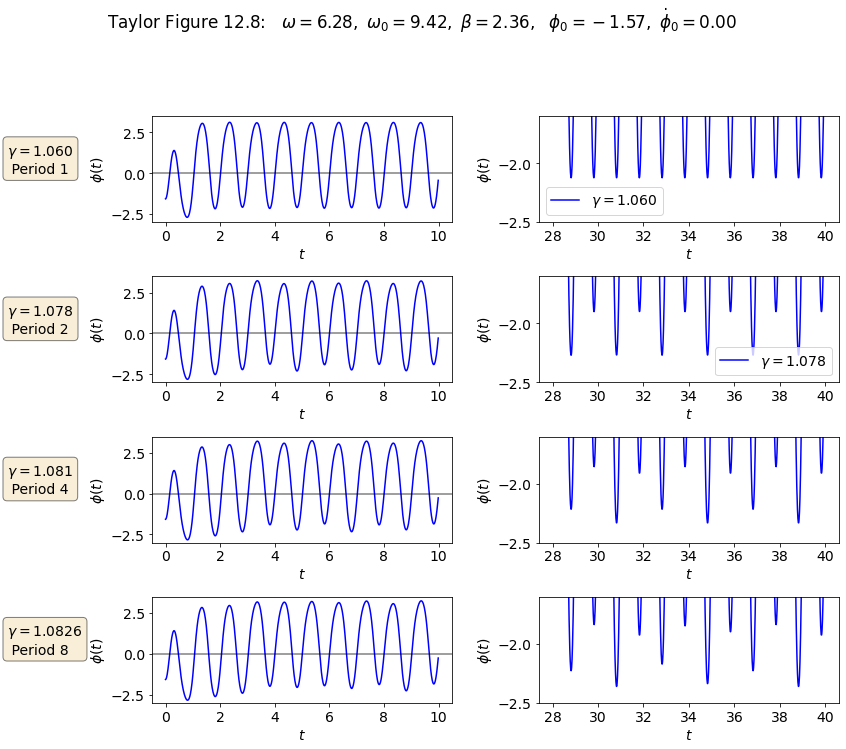

In [56]:
# same initial conditions specified
phi_0 = -np.pi / 2.
phi_dot_0 = 0.

# solve each of the pendulum odes
phi_1, phi_dot_1 = p1.solve_ode(phi_0, phi_dot_0)
phi_2, phi_dot_2 = p2.solve_ode(phi_0, phi_dot_0)
phi_3, phi_dot_3 = p3.solve_ode(phi_0, phi_dot_0)
phi_4, phi_dot_4 = p4.solve_ode(phi_0, phi_dot_0)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})
box_props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# start the plot!
fig = plt.figure(figsize=(12,10))
overall_title = 'Taylor Figure 12.8:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# plot 1a: plot from t=0 to t=10   
ax_1a = fig.add_subplot(4,2,1)                  
start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_1a) 
ax_1a.set_ylim(-3, 3.5)
ax_1a.axhline(y=0., color='black', alpha=0.5)
textstr = r'$\gamma = 1.060$' + '\n' + r' Period 1'
ax_1a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 1b: plot from t=28 to t=40 blown up   
ax_1b = fig.add_subplot(4,2,2)                  
start, stop = start_stop_indices(t_pts, 28., 40.)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=rf'$\gamma = 1.060$', 
            ax=ax_1b) 
ax_1b.set_ylim(-2.5, -1.6)
    
# plot 2a: plot from t=0 to t=10   
ax_2a = fig.add_subplot(4,2,3)                  
start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_2a) 
ax_2a.set_ylim(-3, 3.5)
ax_2a.axhline(y=0., color='black', alpha=0.5)
textstr = r'$\gamma = 1.078$' + '\n' + r' Period 2'
ax_2a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 2b: plot from t=28 to t=40 blown up   
ax_2b = fig.add_subplot(4,2,4)                  
start, stop = start_stop_indices(t_pts, 28., 40.)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=rf'$\gamma = 1.078$', 
            ax=ax_2b) 
ax_2b.set_ylim(-2.5, -1.6)
    
# plot 3a: plot from t=0 to t=10   
ax_3a = fig.add_subplot(4,2,5)                  
start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(t_pts[start : stop], phi_3[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_3a) 
ax_3a.set_ylim(-3, 3.5)
ax_3a.axhline(y=0., color='black', alpha=0.5)
textstr = r'$\gamma = 1.081$' + '\n' + r' Period 4'
ax_3a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 3b: plot from t=28 to t=40 blown up   
ax_3b = fig.add_subplot(4,2,6)                  
start, stop = start_stop_indices(t_pts, 28., 40.)    
plot_y_vs_x(t_pts[start : stop], phi_3[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_3b) 
ax_3b.set_ylim(-2.5, -1.6)
    
# plot 4a: plot from t=0 to t=10   
ax_4a = fig.add_subplot(4,2,7)                  
start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(t_pts[start : stop], phi_4[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_4a) 
ax_4a.set_ylim(-3, 3.5)
ax_4a.axhline(y=0., color='black', alpha=0.5)
textstr = r'$\gamma = 1.0826$' + '\n' + r' Period 8'
ax_4a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 4b: plot from t=28 to t=40 blown up   
ax_4b = fig.add_subplot(4,2,8)                  
start, stop = start_stop_indices(t_pts, 28., 40.)    
plot_y_vs_x(t_pts[start : stop], phi_4[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_4b) 
ax_4b.set_ylim(-2.5, -1.6)

fig.tight_layout()
fig.savefig('Figure_12.8.png', bbox_inches='tight')  # always bbox_inches='tight'